# <center>Topic 2. Decision Trees and Random Forest

## 1. Introduction

T. Mitchell's book *Machine Learning* (1997), machine learning is: 

> A computer program is said to learn from experience *E* with respect to some class of tasks *T* and performance measure *P*, if its performance at tasks in *T*, as measured by *P*, improves with experience *E*.

In the various problem settings *T*, *P*, and *E* can refer to completely different things. Some of the most popular **tasks *T* in machine learning** are the following:

- classification of an instance to one of the categories based on its features;
- regression – prediction of a numerical target feature based on other features of an instance;
- clustering – identifying partitions of instances based on the features of these instances so that the members within the groups are more similar to each other than those in the other groups;
- anomaly detection – search for instances that are "greatly dissimilar" to the rest of the sample or to some group of instances;
- and so many more.


*E* is the available training data: a set of *instances* (clients), a collection of *features* (such as age, salary, type of loan, past loan defaults, etc.) for each, and a *target variable* (whether they defaulted on the loan). This target variable is just a fact of loan default (1 or 0), so recall that this is a (binary) classification problem.  

***P* - metric of the algorithm's performance evaluation.** Such metrics differ for various problems and algorithms, and we'll discuss them as we study new algorithms. For now, we'll refer to a simple metric for classification algorithms, the proportion of correct answers – *accuracy* – on the test set.


## 2. Decision Tree 
Decision Tree is a supervised, non parametric machine learning algorithm. Used for both classification as well as regression problems.

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

<img align='center' src='https://cdn-images-1.medium.com/max/800/1*JAEY3KP7TU2Q6HN6LasMrw.png' width=60%><br>

### Tree Selection

The process of finding the smallest tree that fits the data. Usually this is the tree that yields the lowest cross-validated error.

To construct a decision tree, we split the feature with the purest child nodes. Information gain helps us find the question that reduces uncertainty.

We will first split the feature with the highest information gain. This is a recursive process till all child nodes are pure or until the information gain is zero.

In our example, based on the highest information gain, the best question is “Age <30?”. This will be the root of the decision tree.

#### Entropy
Shannon's entropy is defined for a system with N possible states as follows:

<img align='center' src='https://cdn-images-1.medium.com/max/800/1*VUN62Do2u9B3DaDNXHvPMg.png'><br>

Information Gain is the difference between uncertainty of the starting node and weighted impurity of the two child nodes. Information gain decides which feature should be used to split the data.

Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa.

#### Toy Example
To illustrate how entropy can help us identify good features for building a decision tree, let's look at a toy example. We will predict the color of the ball based on its position.

<img align='center' src='https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png'><br>

There are 9 blue balls and 11 yellow balls. If we randomly pull out a ball, then it will be blue with probability $p_1=\frac{9}{20}$ and yellow with probability $p_2=\frac{11}{20}$, which gives us an entropy $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. This value by itself may not tell us much, but let's see how the value changes if we were to break the balls into two groups: with the position less than or equal to 12 and greater than 12.

<img align='center' src='https://habrastorage.org/webt/5k/ur/88/5kur88sfin6hoffp6ljbyktcur4.png'><br>


The left group has 13 balls, 8 blue and 5 yellow. The entropy of this group is $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. The right group has 7 balls, 1 blue and 6 yellow. The entropy of the right group is $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. As you can see, entropy has decreased in both groups, more so in the right group. Since entropy is, in fact, the degree of chaos (or uncertainty) in the system, the reduction in entropy is called information gain. Formally, the information gain (IG) for a split based on the variable $Q$ (in this example it's a variable "$x \leq 12$") is defined as

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where $q$ is the number of groups after the split, $N_i$ is number of objects from the sample in which variable $Q$ is equal to the $i$-th value. In our example, our split yielded two groups ($q = 2$), one with 13 elements ($N_1 = 13$), the other with 7 ($N_2 = 7$). Therefore, we can compute the information gain as

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

It turns out that dividing the balls into two groups by splitting on "coordinate is less than or equal to 12" gave us a more ordered system. Let's continue to divide them into groups until the balls in each group are all of the same color.

<img align='center' src='https://habrastorage.org/webt/o4/nx/p7/o4nxp7itpg_zxowtmffs5xh3bbw.png'><br>

For the right group, we can easily see that we only need one extra partition using "coordinate less than or equal to 18". But, for the left group, we need three more. Note that the entropy of a group where all of the balls are the same color is equal to 0 ($\log_2{1} = 0$).

We have successfully constructed a decision tree that predicts ball color based on its position. This decision tree may not work well if we add any balls because it has perfectly fit to the training set (initial 20 balls). If we wanted to do well in that case, a tree with fewer "questions" or splits would be more accurate, even if it does not perfectly fit the training set. We will discuss the problem of overfitting later. 

### Gini Index

Gini Index is a measure of node purity or impurity. It is a measure of how often a randomly chosen variable will be misclassified.

while building decision tree we want to know what will be the right question to start with. We split the dataset on people who less then 30 years old. Next we randomly chose an instance and want to know the probability of often we will misclassify. This is Gini Index.

#### Steps to Calculate Gini for a split

1. Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p²+q²).
2. Calculate Gini for split using weighted Gini score of each node of that split

Example: — We want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini index.

<img align='center' src='https://cdn-images-1.medium.com/max/800/0*gx6XsQ8X_KEs7R05.png'><br>

##### Split on Gender:

Gini for sub-node Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68

Gini for sub-node Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55

Weighted Gini for Split Gender = (10/30)*0.68+(20/30)*0.55 = 0.59

##### Similar for Split on Class:

Gini for sub-node Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51

Gini for sub-node Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51

Weighted Gini for Split Class = (14/30)*0.51+(16/30)*0.51 = 0.51

Above, you can see that Gini score for Split on Gender is higher than Split on Class, hence, the node split will take place on Gender.

### Pruning

Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

<img align='center' src='https://habrastorage.org/files/f9f/3b5/133/f9f3b5133bae460ba96ab7e546155b1d.png'><br>

Pruning should reduce the size of a learning tree without reducing predictive accuracy as measured by a cross-validation set. There are many techniques for tree pruning that differ in the measurement that is used to optimize performance.

Tree is first constructed to the maximum depth. Then, from the bottom up, some nodes of the tree are removed by comparing the quality of the tree with and without that partition (comparison is performed using cross-validation).

Pre-pruning a decision tree involves setting the parameters of a decision tree before building it. There a few ways to do this:

- Set maximum tree depth
- Set maximum number of terminal nodes
- Set minimum samples for a node split:
- Controls the size of the resultant terminal nodes
- Set maximum number of features

### Python example 

In [3]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

Let's consider fitting a decision tree to some synthetic data. We will generate samples from two classes, both normal distributions but with different means.

In [13]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Let's plot the data. Informally, the classification problem in this case is to build some "good" boundary separating the two classes (the red dots from the yellow). Machine learning for this case boils down to choosing a good separating border. A straight line will be too simple while some complex curve snaking by each red dot will be too complex and will lead us to making mistakes on new samples. Intuitively, some smooth boundary, or at least a straight line or a hyperplane, would work well on new data.

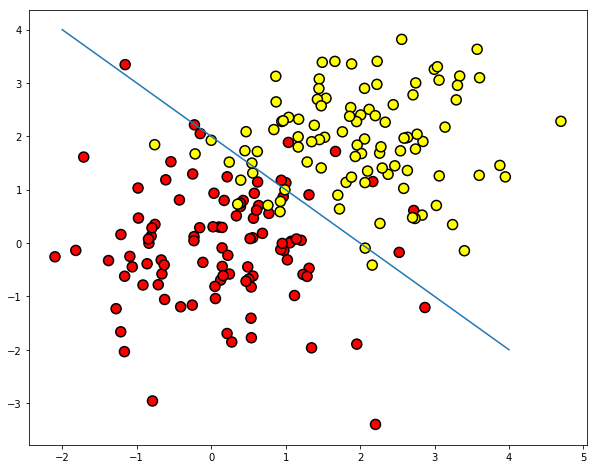

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Let's try to separate these two classes by training an `Sklearn` decision tree. We will use `max_depth` parameter that limits the depth of the tree. Let's visualize the resulting separating boundary.

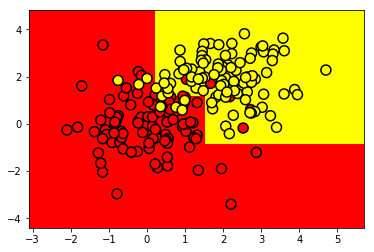

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

And how does the tree itself look? We see that the tree "cuts" the space into 8 rectangles, i.e. the tree has 8 leaves. Within each rectangle, the tree will make the prediction according to the majority label of the objects inside it.

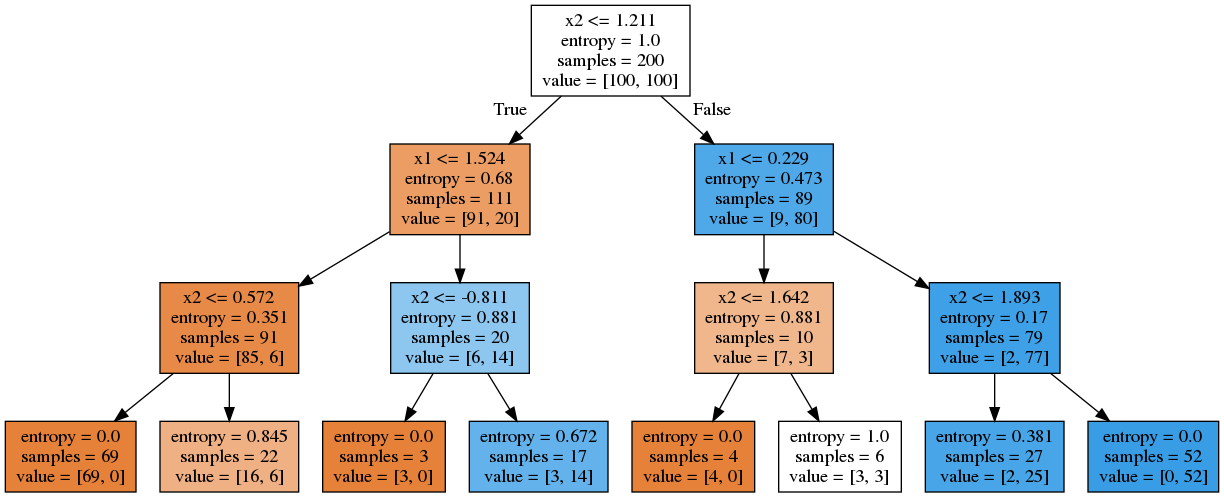

In [12]:
# use .dot format to visualize a tree
from IPython.display import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### How can we "read" such a tree?
 
In the beginning, there were 200 samples (instances), 100 of each class. The entropy of the initial state was maximal, $S=1$. Then, the first partition of the samples into 2 groups was made by comparing the value of $x_2$ with $1.211$ (find this part of the border in the picture above). With that, the entropy of both left and right groups decreased. The process continues up to depth 3. In this visualization, the more samples of the first class, the darker the orange color of the vertex; the more samples of the second class, the darker the blue. At the beginning, the number of samples from two classes is equal, so the root node of the tree is white.

### Class DecisionTreeClassifier in Scikit-learn
The main parameters of the [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class are:

- `max_depth` – the maximum depth of the tree;
- `max_features` - the maximum number of features with which to search for the best partition (this is necessary with a large number of features because it would be "expensive" to search for partitions for *all* features);
- `min_samples_leaf` – the minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members.

The parameters of the tree need to be set depending on input data, and it is usually done by means of *cross-validation*, more on this below.

### Decision Tree in a Regression Problem

When predicting a numeric variable, the idea of a tree construction remains the same, but the quality criteria changes: 

- Variance around the mean: 

$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2, $$

where $\ell$ is the number of samples in a leaf, $y_i$ is the value of the target variable. Simply put, by minimizing the variance around the mean, we look for features that divide the training set in such a way that the values of the target feature in each leaf are roughly equal.

#### Example
Let's generate some data distributed by the function $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ with some noise. Then we will train a tree on it and show what predictions it makes.

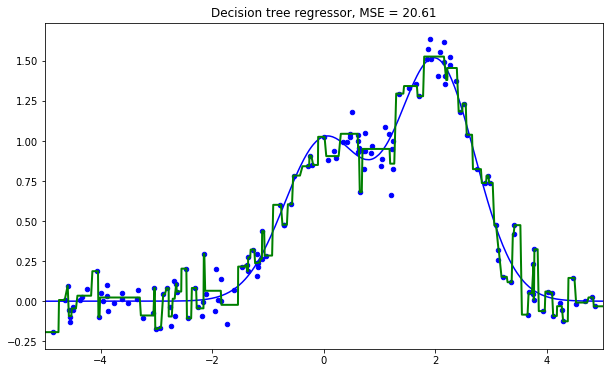

In [17]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=8, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [18]:
DecisionTreeRegressor?

We see that the decision tree approximates the data with a piecewise constant function.

## 3. Useful resources
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-3-classification-decision-trees-and-k-nearest-neighbors-8613c6b6d2cd) based from ODS
- Decision trees are covered practically in every ML book. We recommend “Pattern Recognition and Machine Learning” (C. Bishop) and “Machine Learning: A Probabilistic Perspective” (K. Murphy).
- The book “Machine Learning in Action” (P. Harrington) will walk you through implementations of classic ML algorithms in pure Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) library. These guys work hard on writing really clear documentation.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) by Alex Gramfort and Andreas Mueller.
- One more [ML course](https://github.com/diefimov/MTH594_MachineLearning) with very good materials.
- [Implementations](https://github.com/rushter/MLAlgorithms) of many ML algorithms. Good to search for decision trees.